# Assignment 3 - G35 Training Notebook

**Course:** SYSC 4906 - Introduction to Machine Learning

**Semester:** Fall 2020

**Student Name(s):** William Ma, James Green

**Student Number(s):**  101004624, 1010101010

---

# DeepPurpose Collab Setup

Before implementing and answering the questions below, ensure that these DeepPurpose Collab Setup steps are run correctly to avoid problems later on.

**Note:** Second to last step (rdkit installation) requires user input. Enter `y` and press `Enter`.

In [1]:
# Run first time on colab, then restart runtime
# Must be done because colab uses latest pytorch but DeepPurpose uses 1.4.0 - 
# could cause compatibility issues when moving pkls between environments
# pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 34.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [1]:
!echo $PYTHONPATH

/env/python


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-12-10 17:10:10--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-12-10 17:10:10--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 62.4M 1s
    50K .......... .......... .......... .......... ..........  0%

In [4]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pycparser-2.20             |             py_2          94 KB
    libffi-3.3                 |       he6710b0_2          54 KB
    six-1.15.0                 |   py36h06a4308_0          27 KB
    tqdm-4.54.1                |     pyhd3eb1b0_0          54 KB
    chardet-3.0.4              |py36h06a4308_1003         197 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    wheel-0.36.1               |     pyhd3eb1b0_0          31 KB
    setuptools-51.0.0          |   py36h06a4308_2         936 KB
    urllib3-1.25.11            |             py_0          93 KB
    requests-2.25.0            |     pyhd3eb1b0_0          51 KB
    readline-8.0               |       h7b6447c_0   

pycparser-2.20       |   94 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
six-1.15.0           |   27 KB | ########## | 100% 
tqdm-4.54.1          |   54 KB | ########## | 100% 
chardet-3.0.4        |  197 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
wheel-0.36.1         |   31 KB | ########## | 100% 
setuptools-51.0.0    |  936 KB | ########## | 100% 
urllib3-1.25.11      |   93 KB | ########## | 100% 
requests-2.25.0      |   51 KB | ########## | 100% 
readline-8.0         |  428 KB | ########## | 100% 
brotlipy-0.7.0       |  349 KB | ########## | 100% 
certifi-2020.12.5    |  144 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
pip-20.3.1           |  2.0 MB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
ncurses-6.2          |  1.1 MB | ########## | 100% 
ruamel_yaml-

In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))
_ = (sys.path.append("/content/DeepPurpose/"))

In [6]:
!conda install --channel conda-forge featuretools --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - featuretools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bokeh-2.2.3                |   py36h5fab9bb_0         7.0 MB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_0         143 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    conda-4.9.2                |   py36h5fab9bb_0         3.0 MB  conda-forge
    contextvars-2.4            |             py_0          11 KB  conda-forge
    cytoolz-0.11.0             |   py36h1d69622_1    

In [7]:
!git clone https://github.com/kexinhuang12345/DeepPurpose.git

Cloning into 'DeepPurpose'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 2696 (delta 155), reused 98 (delta 53), pack-reused 2461
Receiving objects: 100% (2696/2696), 15.32 MiB | 28.21 MiB/s, done.
Resolving deltas: 100% (1693/1693), done.


In [8]:
%%bash
cd /content/DeepPurpose/
echo -y | conda env create -f environment.yml
source activate DeepPurpose

Solving environment: ...working... done

libgomp-9.3.0        | 378 KB    | ########## | 100% 
scikit-learn-0.22.1  | 7.1 MB    | ########## | 100% 
pygments-2.6.1       | 683 KB    | ########## | 100% 
glib-2.58.3          | 3.3 MB    | ########## | 100% 
jupyter_core-4.6.3   | 71 KB     | ########## | 100% 
ipython_genutils-0.2 | 21 KB     | ########## | 100% 
mkl-2019.4           | 131.2 MB  | ########## | 100% 
prompt-toolkit-3.0.4 | 233 KB    | ########## | 100% 
ld_impl_linux-64-2.3 | 617 KB    | ########## | 100% 
tornado-6.0.4        | 641 KB    | ########## | 100% 
pytorch-1.4.0        | 432.9 MB  | ########## | 100% 
gstreamer-1.14.5     | 4.5 MB    | ########## | 100% 
pixman-0.38.0        | 594 KB    | ########## | 100% 
dbus-1.13.6          | 602 KB    | ########## | 100% 
pandoc-2.2.3.2       | 14.0 MB   | ########## | 100% 
py-boost-1.67.0      | 278 KB    | ########## | 100% 
terminado-0.8.3      | 23 KB     | ########## | 100% 
lz4-c-1.8.3          | 187 KB    | ######

In [9]:
!pip install git+https://github.com/bp-kelley/descriptastorus pandas-flavor==0.1.0 subword-nmt lifelines wget 

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-k671saam
     |████████████████████████████████| 347 kB 17.1 MB/s 
  Using cached subword_nmt-0.3.7-py2.py3-none-any.whl (26 kB)
  Using cached wget-3.2.zip (10 kB)
  Using cached autograd-1.3.tar.gz (38 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
     |████████████████████████████████| 11.6 MB 7.6 kB/s 
     |████████████████████████████████| 1.1 MB 53.4 MB/s 
     |████████████████████████████████| 231 kB 71.3 MB/s 
  Created wheel for descriptastorus: filename=descriptastorus-2.2.0.4-py3-none-any.whl size=60155 sha256=99600397c3a6d0dce9157067cf7dd88f52f7a53e13dc76bd099c02b5e42b4ab7
  Stored in directory: /tmp/pip-ephem-wheel-cache-un4f6w8e/wheels/d4/c0/32/bb1ad6053d5c73df1da492e5d60860d5676890ddf38f44b5e5
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=1a3145b28573da015afc980276d5d1f1028301bb1c6c9ac62e7ebe8855deabcc
  Stored in directory: /root/.cache/pip/wheels/90/1d/93/c

In [10]:
!conda install -c rdkit rdkit -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2020.12.8  |       h06a4308_0         121 KB
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    fontconfig-2.13.0          |       h9420a91_0         227 KB
    glib-2.66.1                |       h92f7085_0         2.9 MB
    icu-58.2                   |       he6710b0_3        10.5 MB
    libboost-1.73.0            |      h37e3b65_11        13.9 MB
    libuuid-1.0.3              |       h1bed415_2          15 KB
    libxcb-1.14                |       h7b6447c_0         505 KB
    libxml2-2.9.10             |       hb55368b_3         1.2 MB
    open

In [11]:
import os
os.chdir('/content/DeepPurpose/')

**Sanity Check:** If thes two modules below load without error, you aare good to go! *(Warnings are okay)*.

In [12]:
import DeepPurpose.utils
import DeepPurpose.dataset
import warnings
warnings.filterwarnings("ignore")

**Mount Google Drive**: Skip if running locally.


In [13]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Set up paths**

In [14]:
inspire_folder = "/content/drive/MyDrive/Colab Notebooks/DTI/helpers/" # This folder should contain helper files inspire_encoder.py, DTI_inspire.py, and utils_inspire.py
results_folder = "/content/drive/MyDrive/Colab Notebooks/DTI/results/"
data_folder = "/content/drive/MyDrive/Colab Notebooks/DTI/data/"
models_folder = "/content/drive/MyDrive/Colab Notebooks/DTI/models/"

**Add helper folder**
NOTE - Do NOT do this if you are not using colab. Instead, copy helper scripts into a folder where they can be imported , and they can access DeepPurpose

In [15]:
_ = (sys.path.append(inspire_folder))

# Implementation of: InspireDTI

`TODO:` Fill out this notebook with details, explanations, and the results of training, evaluation, and refinement of your final model. This notebook does not have a prescribed structure; you are free to organize it in the way that makes the most sense to you while implementing and generating your final model. The "That's all folks!" marks the end of your notebook. 

`TODO:` You must submit this notebook in `.ipynb` format as well as a serialized version of your final model in a Pickle format `.pkl`. See the assignment instructions for all of the A3 details. Please also delete these instructions in your submitted notebook to keep it focused on your work! ;)

---

In [1]:
# Only if not using colab
results_folder = "./results/"
data_folder = "./data/"
models_folder = "./models/"

In [2]:
# [Delete me] A few imports to get you started ;)
import os

from DeepPurpose.dataset import *
import DTI_inspire as models # It is important that this is imported AFTER DeepPurpose
import matplotlib.pyplot as plt
import pandas as pd
from utils_inspire import * # It is important that this is imported AFTER DeepPurpose

import pickle as pickle_rick
# [Delete me] All of your work follows from here...

**Pytorch version check**: Pytorch version should be 1.4.0, torchvision 0.5.0, cuda enabled

In [3]:
import torch
import torchvision
print(f"torch:{torch.__version__} torchvision:{torchvision.__version__} cuda:{torch.cuda.is_available()}")

torch:1.4.0 torchvision:0.5.0 cuda:True


# Load Data
We are loading the BindingDB and DAVIS datasets and concatenating them.

In [4]:
X_drug, X_target, y  = load_process_DAVIS(path = data_folder, binary = False, convert_to_log = True, threshold = 30)

if not os.path.isfile(data_folder + 'BindingDB_All.tsv'):
    bdb_path = download_BindingDB(path = data_folder)
else:
    bdb_path = data_folder + 'BindingDB_All.tsv'
X_drug2, X_target2, y2  = process_BindingDB(path = bdb_path, df = None, y = 'Kd', binary = False, convert_to_log = True, threshold = 30)

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
Loading Dataset from path...
b'Skipping line 772572: expected 193 fields, saw 205\nSkipping line 772598: expected 193 fields, saw 205\n'
b'Skipping line 805291: expected 193 fields, saw 205\n'
b'Skipping line 827961: expected 193 fields, saw 265\n'
b'Skipping line 1231688: expected 193 fields, saw 241\n'
b'Skipping line 1345591: expected 193 fields, saw 241\nSkipping line 1345592: expected 193 fields, saw 241\nSkipping line 1345593: expected 193 fields, saw 241\nSkipping line 1345594: expected 193 fields, saw 241\nSkipping line 1345595: expected 193 fields, saw 241\nSkipping line 1345596: expected 193 fields, saw 241\nSkipping line 1345597: expected 193 fields, saw 241\nSkipping line 1345598: expected 193 fields, saw 241\nSkipping line 1345599: expected 193 fields, saw 241\n'
b'Skipping line 1358864: expected 193 fields, saw 205\n'
b'Skipping line 1378087: expected 193

In [5]:
X_drug = np.concatenate((X_drug, X_drug2), axis=0)
X_target = np.concatenate((X_target, X_target2), axis=0)
y = np.concatenate((y, y2), axis=0)

As duplicates may occur between the two sets, we need to drop them.

In [6]:
upper = np.vectorize(lambda x: x.upper())
X_drug = upper(X_drug)
X_target = upper(X_target)

In [7]:
all_data = pd.DataFrame(data=zip(X_drug, X_target, y))
all_data

,0,1,2
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.365523
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
...,...,...,...
96495,CC(C)(C)C[C@@H]1N[C@H]([C@H](C2CCCC(CL)C2F)[C@...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,8.552842
96496,CC[C@@H]([C@H](C)O)N1[C@@H]([C@H](C[C@](C)(CC(...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,9.301030
96497,CC(C)[C@@H](CS(=O)(=O)C(C)C)N1[C@@H]([C@H](C[C...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,9.838632
96498,CCCCCCCOC1OC(CO)C(O)C(O)C1O,MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLA...,7.767004


In [8]:
# Keep DAVIS version if duplicates exist
all_data = all_data.drop_duplicates(subset=[0, 1], keep='first')
all_data

,0,1,2
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.365523
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
16,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,4.999996
17,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,4.999996
18,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,4.999996
...,...,...,...
96492,O=C(NCCCCS(=O)(=O)C1CCCCC1)C1CCC2NCCN2C1,MNPAAEAEFNILLATDSYKVTHYKQYPPNTSKVYSYFECREKKTEN...,6.065451
96493,CCOC1CC(CCC1C1=N[C@@](C)(C2CCC(CL)CC2)[C@](C)(...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,8.522879
96494,COC1CC(CCC1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,9.602060
96495,CC(C)(C)C[C@@H]1N[C@H]([C@H](C2CCCC(CL)C2F)[C@...,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,8.552842


## Split Data
We are using the transformer encoding for drugs, and a custom encoding based on DeepConvDTI's encoding for the target.

"Cold Target" is chosen to allow generalizing between proteins in our dataset, and query SARS-Cov-2 proteins

In [9]:
drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'
#ensure none of test smiles appears in set
train, val, test  = data_process(all_data[0], all_data[1], all_data[2], 
                      drug_encoding, target_encoding, 
                      split_method='cold_protein',frac=[0.8,0.1,0.1],
                      random_seed = 42)
# train.head()
print(f"First drug representation: \n{train.drug_encoding.iloc[0]}")
print(f"First target representation: \n{train.target_encoding.iloc[0]}")

Drug Target Interaction Prediction Mode...
in total: 71845 drug-target pairs
encoding drug...
unique drugs: 10685
encoding protein...
unique target sequence: 1449
splitting dataset...
Done.
First drug representation: 
(array([ 800,  122,  248,  282,  623,  272, 1256, 2210,   91,   85,  109,
        119,   80,    8,  282,  861,  209,   19,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]))
First target representation: 
[11 18 18 ...  0  0  0]


## Save Data

In [10]:
train.to_pickle(data_folder + 'G35_data_train.pkl')
val.to_pickle(data_folder + 'G35_data_vali.pkl')
test.to_pickle(data_folder + 'G35_data_test.pkl')

# Benchmark DeepDTA

In [11]:
drug_encoding, target_encoding = 'CNN', 'CNN'
train, val, test  = data_process(all_data[0], all_data[1], all_data[2], 
                      drug_encoding, target_encoding, 
                      split_method='cold_protein',frac=[0.8,0.1,0.1],
                      random_seed = 42)

Drug Target Interaction Prediction Mode...
in total: 71845 drug-target pairs
encoding drug...
unique drugs: 10685
encoding protein...
unique target sequence: 1449
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 33.7379. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 1.25457. Total time 0.01555 hours
Training at Epoch 1 iteration 200 with loss 1.18200. Total time 0.03111 hours
Validation at Epoch 1 , MSE: 1.08476 , Pearson Correlation: 0.47822 with p-value: 0.0 , Concordance Index: 0.70222
Training at Epoch 2 iteration 0 with loss 0.97476. Total time 0.03694 hours
Training at Epoch 2 iteration 100 with loss 0.75512. Total time 0.0525 hours
Training at Epoch 2 iteration 200 with loss 0.85833. Total time 0.06861 hours
Validation at Epoch 2 , MSE: 1.00181 , Pearson Correlation: 0.57092 with p-value: 0.0 , Concordance Index: 0.72602
Training at Epoch 3 iteration 0 with loss 0.85191. Total time 0.07444 hours
Training at Epoch 3 iteration 100 with loss 0.65311. Total time 0.09027 hours
Training at Epoch 3 iteration 200 with loss 0.91719. Total time 0.10638 hours
Validatio

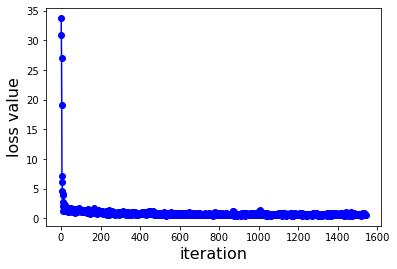

In [12]:
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding,
                         result_folder = results_folder + 'DeepDTA', 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

model = models.model_initialize(**config)
model.train(train, val, test)
model.save_model(models_folder + 'model_DeepDTA')

In [13]:
pickle_rick.dump(model, open(models_folder + "G35_model_DeepDTA.pkl", "wb"))

The MSE of this model was 1.1300066249275849  on the test dataset.

# First model training
Time to train our model. We will load back our data we saved earlier.

In [14]:
train = pd.read_pickle(data_folder + 'G35_data_train.pkl')
val = pd.read_pickle(data_folder + 'G35_data_vali.pkl')
test = pd.read_pickle(data_folder + 'G35_data_test.pkl')

Our configuration for our first run will follow the MT-DTI transformer structure (bert-base) for the the transformer model, and the DeepConvDTI hyperparameters froms that paper for the protein encoder, with the DeepDTA decoder.

The additional code used to implement the DeepConvDTI encoder can be found in the inspire_encoder.py file included.

In [15]:
drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'

config = generate_config(drug_encoding = drug_encoding, 
                      target_encoding = target_encoding, 
                      result_folder = results_folder + 'first_colab',
                      cls_hidden_dims = [1024,1024,512],  
                      train_epoch = 100, 
                      LR = 0.0001, 
                      batch_size = 64,
                      inspire_activation = 'elu',
                      CNN_inspire_filters = 128,
                      protein_strides = [10, 15, 20, 25, 30],
                      inspire_dropout =  0,
                      protein_layers =  [128],
                      transformer_emb_size_drug = 128,
                      transformer_intermediate_size_drug = 512,
                      transformer_num_attention_heads_drug = 8,
                      transformer_n_layer_drug = 8,
                      transformer_dropout_rate = 0.1,
                      transformer_attention_probs_dropout = 0.1,
                      transformer_hidden_dropout_rate = 0.1,
                      num_workers = 0,
                      decay=0.0001
                    )

We will use the DeepPurpose model / training. The DeepPurpose trainer at every epoch employs early stopping. If the validation loss goes up, it will retrieve the previous model with the lowest validation loss. We customized the DeepPurpose trainer so that it would only stop a maximum of 2 times before terminating training. 

The optimizer used by DeepPurpose is Adam, and the loss function is MSE.

We choose to drop the last batch, as for all power of 2 batch sizes under 256, the last batch will have a size of 1 in our dataset. This will cause the batch normalization layer to fail (this is a quirk in PyTorch)

In [16]:
model = models.model_initialize(**config)
model.train(train, val, test, drop_last = True, save_path = models_folder + 'model_first_colab')

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 33.5832. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.61220. Total time 0.00527 hours
Training at Epoch 1 iteration 200 with loss 1.54105. Total time 0.01055 hours
Training at Epoch 1 iteration 300 with loss 1.21459. Total time 0.01583 hours
Training at Epoch 1 iteration 400 with loss 0.93553. Total time 0.02111 hours
Training at Epoch 1 iteration 500 with loss 0.92403. Total time 0.02638 hours
Training at Epoch 1 iteration 600 with loss 0.67781. Total time 0.03194 hours
Training at Epoch 1 iteration 700 with loss 0.79184. Total time 0.03888 hours
Training at Epoch 1 iteration 800 with loss 0.90120. Total time 0.04666 hours
Validation at Epoch 1 , MSE: 1.27200 , Pearson Correlation: 0.51811 with p-value: 0.0 , Concordance Index: 0.69820
Training at Epoch 2 iteration 0 with loss 1.17607. Total time 0.05583 hours
Training at Epoch 2 iteration 100 with loss 1.1

KeyboardInterrupt: 

In [ ]:
pickle_rick.dump(model, open(models_folder + "model_first_colab.pkl", "wb"))

The MSE obtained from the preliminary model was 1.3661350143682738.

# Model fine-tuning

To finetune the model, we will perform random search and pick the best performant model on the validation set. The hyperparameter ranges are as follows:


To perform the random search, we decided to do it randomly, using 10 separate jupyter notebooks to run the model with a different set of hyperparameters, in parallel, to save on computation time.


## Create new embeddings

One of the hyperparameters is to use the transformer protein encodings for the convolutional encoder. To do this, a new dataset needs to be preprocessed, as in the cell below:

In [ ]:
 X_drug, X_target, y  = load_process_DAVIS(path = data_folder, binary = False, convert_to_log = True, threshold = 30)

if not os.path.isfile(data_folder + 'BindingDB_All.tsv'):
    bdb_path = download_BindingDB(path = data_folder)
else:
    bdb_path = data_folder + 'BindingDB_All.tsv'
X_drug2, X_target2, y2  = process_BindingDB(path = bdb_path, df = None, y = 'Kd', binary = False, convert_to_log = True, threshold = 30)

X_drug = np.concatenate((X_drug, X_drug2), axis=0)
X_target = np.concatenate((X_target, X_target2), axis=0)
y = np.concatenate((y, y2), axis=0)

# ensure all uppercase for checking duplicates
upper = np.vectorize(lambda x: x.upper())
X_drug = upper(X_drug)
X_target = upper(X_target)

# Keep DAVIS version if duplicates exist
all_data = pd.DataFrame(data=zip(X_drug, X_target, y))
all_data = all_data.drop_duplicates(subset=[0, 1], keep='first')

drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'
#ensure none of test smiles appears in set
train, val, test  = data_process(all_data[0].to_numpy(), all_data[1].to_numpy(), all_data[2].to_numpy(), 
                      drug_encoding, target_encoding, 
                      split_method='cold_protein',frac=[0.8,0.1,0.1],
                      cnn_inspire_use_transformer_embedding=True, # new embedding set
                      random_seed = 42)
# train.head()
print(f"First drug representation: \n{train.drug_encoding.iloc[0]}")
print(f"First target representation: \n{train.target_encoding.iloc[0]}")

Using the same random seed as before, the split should be the same, as can be confirmed by the first drug representation.

If everything is in order, save

In [ ]:
train.to_pickle(data_folder + 'G35_data_train_t_emb.pkl')
val.to_pickle(data_folder + 'G35_data_vali_t_emb.pkl')
test.to_pickle(data_folder + 'G35_data_test_t_emb.pkl')

## Hyperparameter selection and randomization

The available hyperparameters are as in the text cell below:

In [4]:
hyperparameter_ranges = {
                      'cls_hidden_n_layers': list(range(1, 5)),
                      'cls_hidden_dims': [1024,512,256,128],  
                      'LR': [ 0.001, 0.0001], 
                      'batch_size': [32, 64, 128],
                      'cnn_inspire_use_transformer_embedding': [True, False],
                      'inspire_activation': ['elu', 'relu', 'sigmoid'],
                      'CNN_inspire_filters': [64, 128],
                      'n_protein_strides': list(range(3, 7)),
                      'protein_strides': [5, 10, 15, 20, 25, 30, 35, 40],
                      'inspire_dropout':  [x / 100.0 for x in range(0, 22, 2)],
                      'n_protein_layers': list(range(0,3)),
                      'protein_layers':  [128, 64],
                      'transformer_size': ['base', 'large'],
                      'transformer_dropout_rate': [x / 100.0 for x in range(0, 22, 2)],
                      'transformer_attention_probs_dropout': [x / 100.0 for x in range(0, 22, 2)],
                      'transformer_hidden_dropout_rate': [x / 100.0 for x in range(0, 22, 2)],
                      'decay': [0.001, 0.0001, 0]
}

hyperparameter_ranges

{'cls_hidden_n_layers': [1, 2, 3, 4],
 'cls_hidden_dims': [1024, 512, 256, 128],
 'LR': [0.001, 0.0001],
 'batch_size': [32, 64, 128],
 'cnn_inspire_use_transformer_embedding': [True, False],
 'inspire_activation': ['elu', 'relu', 'sigmoid'],
 'CNN_inspire_filters': [64, 128],
 'n_protein_strides': [3, 4, 5, 6],
 'protein_strides': [5, 10, 15, 20, 25, 30, 35, 40],
 'inspire_dropout': [0.0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12,
  0.14,
  0.16,
  0.18,
  0.2],
 'n_protein_layers': [0, 1, 2],
 'protein_layers': [128, 64],
 'transformer_size': ['base', 'large'],
 'transformer_dropout_rate': [0.0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12,
  0.14,
  0.16,
  0.18,
  0.2],
 'transformer_attention_probs_dropout': [0.0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12,
  0.14,
  0.16,
  0.18,
  0.2],
 'transformer_hidden_dropout_rate': [0.0,
  0.02,
  0.04,
  0.06,
  0.08,
  0.1,
  0.12,
  0.14,
  0.16,
  0.18,
  0.2],
 'decay': [0.001, 0.0001, 0]}

Now pick random hyperparameters (each notebook uses a different seed)

In [19]:
import random
random_seed = 1
random.seed(random_seed)

hyperparameters = {}
cls_hidden_n_layers = random.choice(hyperparameter_ranges['cls_hidden_n_layers'])
# sample with replacement, size of layer from greatest to least
hyperparameters['cls_hidden_dims'] = sorted(random.choices(hyperparameter_ranges['cls_hidden_dims'], k=cls_hidden_n_layers), reverse=True)
hyperparameters['LR'] = random.choice(hyperparameter_ranges['LR'])
hyperparameters['batch_size'] = random.choice(hyperparameter_ranges['batch_size'])
hyperparameters['cnn_inspire_use_transformer_embedding'] = random.choice(hyperparameter_ranges['cnn_inspire_use_transformer_embedding'])
hyperparameters['inspire_activation'] = random.choice(hyperparameter_ranges['inspire_activation'])
hyperparameters['CNN_inspire_filters'] = random.choice(hyperparameter_ranges['CNN_inspire_filters'])
n_protein_strides = random.choice(hyperparameter_ranges['n_protein_strides'])
# sample without replacement and sort
hyperparameters['protein_strides'] = sorted(random.sample(hyperparameter_ranges['protein_strides'], k=n_protein_strides))
hyperparameters['inspire_dropout'] = random.choice(hyperparameter_ranges['inspire_dropout'])
n_protein_layers = random.choice(hyperparameter_ranges['n_protein_layers'])
# sample with replacement
hyperparameters['protein_layers'] = random.choices(hyperparameter_ranges['protein_layers'], k=n_protein_layers)

# Transformer sizes from MT-DTI

hyperparameters['epochs'] = 100
if random.choice(hyperparameter_ranges['transformer_size']) is 'large':
    hyperparameters['transformer_emb_size_drug'] = 240
    hyperparameters['transformer_intermediate_size_drug'] = 960
    hyperparameters['transformer_num_attention_heads_drug'] = 16
    hyperparameters['transformer_n_layer_drug'] = 24
else:
    hyperparameters['transformer_emb_size_drug'] = 128
    hyperparameters['transformer_intermediate_size_drug'] = 512
    hyperparameters['transformer_num_attention_heads_drug'] = 8
    hyperparameters['transformer_n_layer_drug'] = 8

hyperparameters['transformer_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_dropout_rate'])
hyperparameters['transformer_attention_probs_dropout'] = random.choice(hyperparameter_ranges['transformer_attention_probs_dropout'])
hyperparameters['transformer_hidden_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_hidden_dropout_rate'])
hyperparameters['decay'] = random.choice(hyperparameter_ranges['decay'])

hyperparameters

{'CNN_inspire_filters': 128,
 'LR': 0.0001,
 'batch_size': 64,
 'cls_hidden_dims': [512, 512, 512, 256],
 'cnn_inspire_use_transformer_embedding': False,
 'decay': 0.001,
 'epochs': 40,
 'inspire_activation': 'sigmoid',
 'inspire_dropout': 0.14,
 'protein_layers': [128],
 'protein_strides': [5, 10, 25, 30],
 'transformer_attention_probs_dropout': 0.18,
 'transformer_dropout_rate': 0.0,
 'transformer_emb_size_drug': 128,
 'transformer_hidden_dropout_rate': 0.06,
 'transformer_intermediate_size_drug': 512,
 'transformer_n_layer_drug': 8,
 'transformer_num_attention_heads_drug': 8}

## Train with random search

Select correct preprocessed data for encoding

In [20]:
if hyperparameters['cnn_inspire_use_transformer_embedding']:
    train = pd.read_pickle(data_folder + 'G35_data_train_t_emb.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali_t_emb.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test_t_emb.pkl')
else:
    train = pd.read_pickle(data_folder + 'G35_data_train.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test.pkl')


Start training model

In [21]:
drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'

config = generate_config(drug_encoding = drug_encoding, 
                      target_encoding = target_encoding, 
                      result_folder = results_folder + str(random_seed),
                      cls_hidden_dims = hyperparameters['cls_hidden_dims'],  
                      train_epoch = hyperparameters['epochs'], 
                      LR = hyperparameters['LR'], 
                      batch_size = hyperparameters['batch_size'],
                      cnn_inspire_use_transformer_embedding = hyperparameters['cnn_inspire_use_transformer_embedding'],
                      inspire_activation = hyperparameters['inspire_activation'],
                      CNN_inspire_filters = hyperparameters['CNN_inspire_filters'],
                      protein_strides = hyperparameters['protein_strides'],
                      inspire_dropout =  hyperparameters['inspire_dropout'],
                      protein_layers =  hyperparameters['protein_layers'],
                      transformer_emb_size_drug = hyperparameters['transformer_emb_size_drug'],
                      transformer_intermediate_size_drug = hyperparameters['transformer_intermediate_size_drug'],
                      transformer_num_attention_heads_drug = hyperparameters['transformer_num_attention_heads_drug'],
                      transformer_n_layer_drug = hyperparameters['transformer_n_layer_drug'],
                      transformer_dropout_rate = hyperparameters['transformer_dropout_rate'],
                      transformer_attention_probs_dropout = hyperparameters['transformer_attention_probs_dropout'],
                      transformer_hidden_dropout_rate = hyperparameters['transformer_hidden_dropout_rate'],
                      num_workers = 0,
                      decay=hyperparameters['decay']
                    )

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 35.1838. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.44542. Total time 0.00583 hours
Training at Epoch 1 iteration 200 with loss 1.77626. Total time 0.01138 hours
Training at Epoch 1 iteration 300 with loss 1.77811. Total time 0.01722 hours
Training at Epoch 1 iteration 400 with loss 1.45812. Total time 0.02277 hours
Training at Epoch 1 iteration 500 with loss 1.47349. Total time 0.02861 hours
Training at Epoch 1 iteration 600 with loss 1.20996. Total time 0.03472 hours
Training at Epoch 1 iteration 700 with loss 1.98254. Total time 0.04055 hours
Training at Epoch 1 iteration 800 with loss 1.62931. Total time 0.04666 hours
Validation at Epoch 1 , MSE: 1.36789 , Pearson Correlation: 0.26661 with p-value: 3.24641 , Concordance Index: 0.61145
Training at Epoch 2 iteration 0 with loss 1.49442. Total time 0.05333 hours
Training at Epoch 2 iteration 100 with loss

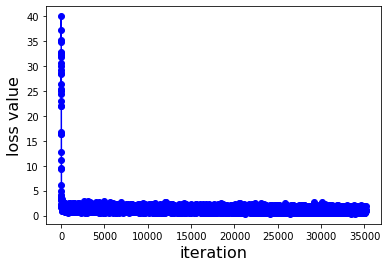

In [22]:
model = models.model_initialize(**config)
model.train(train, val, val, drop_last = True, save_path = models_folder + str(random_seed))

In [23]:
pickle_rick.dump(model, open(models_folder + "model_" + str(random_seed) + ".pkl", "wb"))

## Train and validate some more 

### 3

In [ ]:
import random
random_seed = 3
random.seed(random_seed)

hyperparameters = {}
cls_hidden_n_layers = random.choice(hyperparameter_ranges['cls_hidden_n_layers'])
# sample with replacement, size of layer from greatest to least
hyperparameters['cls_hidden_dims'] = sorted(random.choices(hyperparameter_ranges['cls_hidden_dims'], k=cls_hidden_n_layers), reverse=True)
hyperparameters['LR'] = random.choice(hyperparameter_ranges['LR'])
hyperparameters['batch_size'] = random.choice(hyperparameter_ranges['batch_size'])
hyperparameters['cnn_inspire_use_transformer_embedding'] = random.choice(hyperparameter_ranges['cnn_inspire_use_transformer_embedding'])
hyperparameters['inspire_activation'] = random.choice(hyperparameter_ranges['inspire_activation'])
hyperparameters['CNN_inspire_filters'] = random.choice(hyperparameter_ranges['CNN_inspire_filters'])
n_protein_strides = random.choice(hyperparameter_ranges['n_protein_strides'])
# sample without replacement and sort
hyperparameters['protein_strides'] = sorted(random.sample(hyperparameter_ranges['protein_strides'], k=n_protein_strides))
hyperparameters['inspire_dropout'] = random.choice(hyperparameter_ranges['inspire_dropout'])
n_protein_layers = random.choice(hyperparameter_ranges['n_protein_layers'])
# sample with replacement
hyperparameters['protein_layers'] = random.choices(hyperparameter_ranges['protein_layers'], k=n_protein_layers)

# Transformer sizes from MT-DTI

hyperparameters['epochs'] = 100
if random.choice(hyperparameter_ranges['transformer_size']) is 'large':
    hyperparameters['transformer_emb_size_drug'] = 240
    hyperparameters['transformer_intermediate_size_drug'] = 960
    hyperparameters['transformer_num_attention_heads_drug'] = 16
    hyperparameters['transformer_n_layer_drug'] = 24
else:
    hyperparameters['transformer_emb_size_drug'] = 128
    hyperparameters['transformer_intermediate_size_drug'] = 512
    hyperparameters['transformer_num_attention_heads_drug'] = 8
    hyperparameters['transformer_n_layer_drug'] = 8

hyperparameters['transformer_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_dropout_rate'])
hyperparameters['transformer_attention_probs_dropout'] = random.choice(hyperparameter_ranges['transformer_attention_probs_dropout'])
hyperparameters['transformer_hidden_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_hidden_dropout_rate'])
hyperparameters['decay'] = random.choice(hyperparameter_ranges['decay'])

hyperparameters

In [ ]:
if hyperparameters['cnn_inspire_use_transformer_embedding']:
    train = pd.read_pickle(data_folder + 'G35_data_train_t_emb.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali_t_emb.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test_t_emb.pkl')
else:
    train = pd.read_pickle(data_folder + 'G35_data_train.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test.pkl')

drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'

config = generate_config(drug_encoding = drug_encoding, 
                      target_encoding = target_encoding, 
                      result_folder = results_folder + str(random_seed),
                      cls_hidden_dims = hyperparameters['cls_hidden_dims'],  
                      train_epoch = hyperparameters['epochs'], 
                      LR = hyperparameters['LR'], 
                      batch_size = hyperparameters['batch_size'],
                      cnn_inspire_use_transformer_embedding = hyperparameters['cnn_inspire_use_transformer_embedding'],
                      inspire_activation = hyperparameters['inspire_activation'],
                      CNN_inspire_filters = hyperparameters['CNN_inspire_filters'],
                      protein_strides = hyperparameters['protein_strides'],
                      inspire_dropout =  hyperparameters['inspire_dropout'],
                      protein_layers =  hyperparameters['protein_layers'],
                      transformer_emb_size_drug = hyperparameters['transformer_emb_size_drug'],
                      transformer_intermediate_size_drug = hyperparameters['transformer_intermediate_size_drug'],
                      transformer_num_attention_heads_drug = hyperparameters['transformer_num_attention_heads_drug'],
                      transformer_n_layer_drug = hyperparameters['transformer_n_layer_drug'],
                      transformer_dropout_rate = hyperparameters['transformer_dropout_rate'],
                      transformer_attention_probs_dropout = hyperparameters['transformer_attention_probs_dropout'],
                      transformer_hidden_dropout_rate = hyperparameters['transformer_hidden_dropout_rate'],
                      num_workers = 0,
                      decay=hyperparameters['decay']
                    )

model = models.model_initialize(**config)
model.train(train, val, val, drop_last = True, save_path = models_folder + str(random_seed))

pickle_rick.dump(model, open(models_folder + "model_" + str(random_seed) + ".pkl", "wb"))


### 5

In [ ]:
import random
random_seed = 5
random.seed(random_seed)

hyperparameters = {}
cls_hidden_n_layers = random.choice(hyperparameter_ranges['cls_hidden_n_layers'])
# sample with replacement, size of layer from greatest to least
hyperparameters['cls_hidden_dims'] = sorted(random.choices(hyperparameter_ranges['cls_hidden_dims'], k=cls_hidden_n_layers), reverse=True)
hyperparameters['LR'] = random.choice(hyperparameter_ranges['LR'])
hyperparameters['batch_size'] = random.choice(hyperparameter_ranges['batch_size'])
hyperparameters['cnn_inspire_use_transformer_embedding'] = random.choice(hyperparameter_ranges['cnn_inspire_use_transformer_embedding'])
hyperparameters['inspire_activation'] = random.choice(hyperparameter_ranges['inspire_activation'])
hyperparameters['CNN_inspire_filters'] = random.choice(hyperparameter_ranges['CNN_inspire_filters'])
n_protein_strides = random.choice(hyperparameter_ranges['n_protein_strides'])
# sample without replacement and sort
hyperparameters['protein_strides'] = sorted(random.sample(hyperparameter_ranges['protein_strides'], k=n_protein_strides))
hyperparameters['inspire_dropout'] = random.choice(hyperparameter_ranges['inspire_dropout'])
n_protein_layers = random.choice(hyperparameter_ranges['n_protein_layers'])
# sample with replacement
hyperparameters['protein_layers'] = random.choices(hyperparameter_ranges['protein_layers'], k=n_protein_layers)

# Transformer sizes from MT-DTI

hyperparameters['epochs'] = 100
if random.choice(hyperparameter_ranges['transformer_size']) is 'large':
    hyperparameters['transformer_emb_size_drug'] = 240
    hyperparameters['transformer_intermediate_size_drug'] = 960
    hyperparameters['transformer_num_attention_heads_drug'] = 16
    hyperparameters['transformer_n_layer_drug'] = 24
else:
    hyperparameters['transformer_emb_size_drug'] = 128
    hyperparameters['transformer_intermediate_size_drug'] = 512
    hyperparameters['transformer_num_attention_heads_drug'] = 8
    hyperparameters['transformer_n_layer_drug'] = 8

hyperparameters['transformer_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_dropout_rate'])
hyperparameters['transformer_attention_probs_dropout'] = random.choice(hyperparameter_ranges['transformer_attention_probs_dropout'])
hyperparameters['transformer_hidden_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_hidden_dropout_rate'])
hyperparameters['decay'] = random.choice(hyperparameter_ranges['decay'])

hyperparameters

In [ ]:
if hyperparameters['cnn_inspire_use_transformer_embedding']:
    train = pd.read_pickle(data_folder + 'G35_data_train_t_emb.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali_t_emb.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test_t_emb.pkl')
else:
    train = pd.read_pickle(data_folder + 'G35_data_train.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test.pkl')

drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'

config = generate_config(drug_encoding = drug_encoding, 
                      target_encoding = target_encoding, 
                      result_folder = results_folder + str(random_seed),
                      cls_hidden_dims = hyperparameters['cls_hidden_dims'],  
                      train_epoch = hyperparameters['epochs'], 
                      LR = hyperparameters['LR'], 
                      batch_size = hyperparameters['batch_size'],
                      cnn_inspire_use_transformer_embedding = hyperparameters['cnn_inspire_use_transformer_embedding'],
                      inspire_activation = hyperparameters['inspire_activation'],
                      CNN_inspire_filters = hyperparameters['CNN_inspire_filters'],
                      protein_strides = hyperparameters['protein_strides'],
                      inspire_dropout =  hyperparameters['inspire_dropout'],
                      protein_layers =  hyperparameters['protein_layers'],
                      transformer_emb_size_drug = hyperparameters['transformer_emb_size_drug'],
                      transformer_intermediate_size_drug = hyperparameters['transformer_intermediate_size_drug'],
                      transformer_num_attention_heads_drug = hyperparameters['transformer_num_attention_heads_drug'],
                      transformer_n_layer_drug = hyperparameters['transformer_n_layer_drug'],
                      transformer_dropout_rate = hyperparameters['transformer_dropout_rate'],
                      transformer_attention_probs_dropout = hyperparameters['transformer_attention_probs_dropout'],
                      transformer_hidden_dropout_rate = hyperparameters['transformer_hidden_dropout_rate'],
                      num_workers = 0,
                      decay=hyperparameters['decay']
                    )

model = models.model_initialize(**config)
model.train(train, val, val, drop_last = True, save_path = models_folder + str(random_seed))

pickle_rick.dump(model, open(models_folder + "model_" + str(random_seed) + ".pkl", "wb"))

### 7

In [ ]:
import random
random_seed = 7
random.seed(random_seed)

hyperparameters = {}
cls_hidden_n_layers = random.choice(hyperparameter_ranges['cls_hidden_n_layers'])
# sample with replacement, size of layer from greatest to least
hyperparameters['cls_hidden_dims'] = sorted(random.choices(hyperparameter_ranges['cls_hidden_dims'], k=cls_hidden_n_layers), reverse=True)
hyperparameters['LR'] = random.choice(hyperparameter_ranges['LR'])
hyperparameters['batch_size'] = random.choice(hyperparameter_ranges['batch_size'])
hyperparameters['cnn_inspire_use_transformer_embedding'] = random.choice(hyperparameter_ranges['cnn_inspire_use_transformer_embedding'])
hyperparameters['inspire_activation'] = random.choice(hyperparameter_ranges['inspire_activation'])
hyperparameters['CNN_inspire_filters'] = random.choice(hyperparameter_ranges['CNN_inspire_filters'])
n_protein_strides = random.choice(hyperparameter_ranges['n_protein_strides'])
# sample without replacement and sort
hyperparameters['protein_strides'] = sorted(random.sample(hyperparameter_ranges['protein_strides'], k=n_protein_strides))
hyperparameters['inspire_dropout'] = random.choice(hyperparameter_ranges['inspire_dropout'])
n_protein_layers = random.choice(hyperparameter_ranges['n_protein_layers'])
# sample with replacement
hyperparameters['protein_layers'] = random.choices(hyperparameter_ranges['protein_layers'], k=n_protein_layers)

# Transformer sizes from MT-DTI

hyperparameters['epochs'] = 100
if random.choice(hyperparameter_ranges['transformer_size']) is 'large':
    hyperparameters['transformer_emb_size_drug'] = 240
    hyperparameters['transformer_intermediate_size_drug'] = 960
    hyperparameters['transformer_num_attention_heads_drug'] = 16
    hyperparameters['transformer_n_layer_drug'] = 24
else:
    hyperparameters['transformer_emb_size_drug'] = 128
    hyperparameters['transformer_intermediate_size_drug'] = 512
    hyperparameters['transformer_num_attention_heads_drug'] = 8
    hyperparameters['transformer_n_layer_drug'] = 8

hyperparameters['transformer_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_dropout_rate'])
hyperparameters['transformer_attention_probs_dropout'] = random.choice(hyperparameter_ranges['transformer_attention_probs_dropout'])
hyperparameters['transformer_hidden_dropout_rate'] = random.choice(hyperparameter_ranges['transformer_hidden_dropout_rate'])
hyperparameters['decay'] = random.choice(hyperparameter_ranges['decay'])

hyperparameters

In [ ]:
if hyperparameters['cnn_inspire_use_transformer_embedding']:
    train = pd.read_pickle(data_folder + 'G35_data_train_t_emb.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali_t_emb.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test_t_emb.pkl')
else:
    train = pd.read_pickle(data_folder + 'G35_data_train.pkl')
    val = pd.read_pickle(data_folder + 'G35_data_vali.pkl')
    test = pd.read_pickle(data_folder + 'G35_data_test.pkl')

drug_encoding, target_encoding = 'Transformer', 'CNN_inspire'

config = generate_config(drug_encoding = drug_encoding, 
                      target_encoding = target_encoding, 
                      result_folder = results_folder + str(random_seed),
                      cls_hidden_dims = hyperparameters['cls_hidden_dims'],  
                      train_epoch = hyperparameters['epochs'], 
                      LR = hyperparameters['LR'], 
                      batch_size = hyperparameters['batch_size'],
                      cnn_inspire_use_transformer_embedding = hyperparameters['cnn_inspire_use_transformer_embedding'],
                      inspire_activation = hyperparameters['inspire_activation'],
                      CNN_inspire_filters = hyperparameters['CNN_inspire_filters'],
                      protein_strides = hyperparameters['protein_strides'],
                      inspire_dropout =  hyperparameters['inspire_dropout'],
                      protein_layers =  hyperparameters['protein_layers'],
                      transformer_emb_size_drug = hyperparameters['transformer_emb_size_drug'],
                      transformer_intermediate_size_drug = hyperparameters['transformer_intermediate_size_drug'],
                      transformer_num_attention_heads_drug = hyperparameters['transformer_num_attention_heads_drug'],
                      transformer_n_layer_drug = hyperparameters['transformer_n_layer_drug'],
                      transformer_dropout_rate = hyperparameters['transformer_dropout_rate'],
                      transformer_attention_probs_dropout = hyperparameters['transformer_attention_probs_dropout'],
                      transformer_hidden_dropout_rate = hyperparameters['transformer_hidden_dropout_rate'],
                      num_workers = 0,
                      decay=hyperparameters['decay']
                    )

model = models.model_initialize(**config)
model.train(train, val, val, drop_last = True, save_path = models_folder + str(random_seed))

pickle_rick.dump(model, open(models_folder + "model_" + str(random_seed) + ".pkl", "wb"))

## Final Results

The validation MSEs for each model trained with hyperparameters initialized with each random seed is as shown below:

| Random Seed | Validation MSE     |
|-------------|--------------------|
| 1           | 1.4481742147967516 |
| 2           | 1.4512810186712808 |
| 3           | 1.321018380754432  |
| 4           | 1.582385160276786  |
| 5           | 1.4466397526418646 |
| 6           | 1.318436550505624  |
| 7           | 1.442754385457474  |
| 8           | 1.4510069880934893 |
| 9           | 1.3208448951804213 |
| 10          |                    |
| 11          | 1.4396514819505644 |
| 12          | 1.3177851021941696 |
| 13          | 1.4536449160341887 |

## Test best model

The best model was 12, so we will load it up and test it on the test dataset

In [4]:
random_seed = 12

from torch.utils.data import SequentialSampler
from prettytable import PrettyTable

model = models.model_pretrained(path_dir=models_folder + str(random_seed), result_folder=results_folder)

if model.config['cnn_inspire_use_transformer_embedding']:
    test = pd.read_pickle(data_folder + 'G35_data_test_t_emb.pkl')
else:
    test = pd.read_pickle(data_folder + 'G35_data_test.pkl')


model.model.cuda()
model.model.eval()

# The following is simply the 
info = data_process_loader(test.index.values, test.Label.values, test, **model.config)
params_test = {'batch_size': model.config['batch_size'],
        'shuffle': False,
        'num_workers': model.config['num_workers'],
        'drop_last': False,
        'sampler':SequentialSampler(info)}

testing_generator = data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **model.config),         **params_test)

float2str = lambda x:'%0.4f'%x

with torch.no_grad():
    mse, r2, p_val, CI, logits = model.test_(testing_generator, model.model)
test_table = PrettyTable(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
test_table.add_row(list(map(float2str, [mse, r2, p_val, CI])))
print('TEST MSE: ' + str(mse) + ' , Pearson Correlation: ' + str(r2) 
    + ' with p-value: ' + str(p_val) +' , Concordance Index: '+str(CI))
np.save(os.path.join(model.result_folder, str(model.drug_encoding) + '_' + str(model.target_encoding) 
    + '_logits.npy'), np.array(logits))    

TEST MSE: 1.3440235234170779 , Pearson Correlation: 0.2880784452961667 with p-value: 1.1379804754393415e-147 , Concordance Index: 0.625150882116894


The MSE of this model was 1.3440235234170779 on the test dataset, which was better than DeepDTA, which was 1.3492910755590664.

We will now save this model:


In [5]:
final_model = model
final_model.save_model(models_folder + 'G35_model')

In [6]:
# [Delete me] This should be your last code cell. Make sure to change the filename to your group id!
pickle_rick.dump(final_model, open(models_folder + "G35_model.pkl", "wb"))


---
# That's all folks!

In [17]:
all_data[2].values[0]

'7.3655227298392685'